# Notebook 13: Topic Modeling Visualizations

**Project: Data Triage of Transcribed Nixon Tapes** <br>
*Michelle Ballard and April Crompton* <br>
Loyola University Maryland Data Science Project 

## Import Statements

In [1]:
import pprint, pickle
import pandas as pd

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from pprint import pprint
import matplotlib.pyplot as plt

import spacy

import pyLDAvis
import pyLDAvis.gensim_models

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter

In [4]:
# unpickle preserved LDA Data

pkl_file = open('LDA_data.pkl', 'rb')

LDA_models = pickle.load(pkl_file)
LDA_topics = pickle.load(pkl_file)
coherences = pickle.load(pkl_file)
u_mass = pickle.load(pkl_file)
id2word = pickle.load(pkl_file)
texts = pickle.load(pkl_file)
corpus = pickle.load(pkl_file)



In [14]:
# unpickle preserved preprocessed coreference resolved text
pkl_file = open('pipelines_coref.pkl', 'rb')
df_coref_pipe = pickle.load(pkl_file)

# Select only the winning pipeline
df_top_pipelines = df_coref_pipe[['exhibit','orig_exhibit', 'speech_final', 'Pipeline13']].copy()
df_top_pipelines.rename(columns={'Pipeline13':'Pipeline13c'}, inplace=True)
df_top_pipelines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   exhibit       141 non-null    object
 1   orig_exhibit  141 non-null    object
 2   speech_final  141 non-null    object
 3   Pipeline13c   141 non-null    object
dtypes: object(4)
memory usage: 4.5+ KB


In [6]:
# pkl_file = open('df_top_pipelines.pkl', 'rb')

# df_top_pipelines = pickle.load(pkl_file)
# df_top_pipelines.info()

AttributeError: Can't get attribute '_unpickle_block' on <module 'pandas._libs.internals' from '/Users/aprilcrompton/opt/anaconda3/envs/capstone/lib/python3.8/site-packages/pandas/_libs/internals.cpython-38-darwin.so'>

## LDA Model Visualization

1. Print the topics from best performaing LDA model.
2. Apply human interpretation to these topics.
3. Visualize topics via pyLDAvis package, which allows interactive exploration of results.

### Define Winner for Visualization

In [15]:
# Determined Winner from heatmap: Pipeline13c, with 5 Topics
top_pipeline = 'Pipeline13c'
top_topic = '_topics7'
winner = top_pipeline + top_topic
print(winner)

Pipeline13c_topics7


### Results and Interpretation

In [16]:
from pprint import pprint

# From best model, print the Keywords for each topic
pprint(LDA_models[winner].print_topics())
doc_lda = LDA_models[winner][corpus[top_pipeline]]

[(0,
  '0.011*"mrs" + 0.011*"bud" + 0.007*"byrnes" + 0.005*"bebe" + 0.004*"sba" + '
  '0.003*"parker" + 0.003*"parole" + 0.003*"mel" + 0.003*"mills" + '
  '0.003*"mclaren"'),
 (1,
  '0.013*"de" + 0.011*"ed" + 0.010*"chapman" + 0.008*"tom" + 0.008*"alsop" + '
  '0.006*"shepherds" + 0.006*"twentieth" + 0.006*"dnc" + 0.006*"titus" + '
  '0.006*"uhhe"'),
 (2,
  '0.016*"buzhardt" + 0.010*"shapiro" + 0.006*"lyndon" + 0.004*"panel" + '
  '0.003*"cox" + 0.003*"jack" + 0.003*"senior" + 0.003*"barker" + '
  '0.003*"humanitarian" + 0.002*"parker"'),
 (3,
  '0.007*"hoffals" + 0.005*"mclaren" + 0.004*"sec" + 0.004*"sneed" + '
  '0.004*"parole" + 0.004*"helms" + 0.004*"cont" + 0.004*"envelope" + '
  '0.003*"bart" + 0.003*"polls"'),
 (4,
  '0.008*"girls" + 0.008*"buzhardt" + 0.007*"bazelon" + 0.005*"reitz" + '
  '0.003*"tricia" + 0.003*"sheehan" + 0.003*"socially" + 0.003*"sandwedge" + '
  '0.003*"bush" + 0.003*"newsmen"'),
 (5,
  '0.013*"laird" + 0.013*"thugs" + 0.010*"mister" + 0.006*"hughes" + '
 

### Interactive pyLDAvis Visualization

In [17]:
# suppress future warnings from LDAvis package
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Visualize the topics from best model
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(LDA_models[winner], corpus[top_pipeline], id2word[top_pipeline],mds='mmds')
LDAvis_prepared



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.002163 -0.209657       1        1  17.779151
4     -0.194659  0.074495       2        1  15.724246
1      0.123147  0.167857       3        1  15.678237
6      0.235921 -0.064711       4        1  14.806269
3      0.049312 -0.034282       5        1  14.485429
5     -0.159142 -0.100437       6        1  11.489411
2     -0.052415  0.166735       7        1  10.037256, topic_info=           Term       Freq      Total Category  logprob  loglift
747    buzhardt  66.000000  66.000000  Default  30.0000  30.0000
1077       milk  44.000000  44.000000  Default  29.0000  29.0000
4578        bud  43.000000  43.000000  Default  28.0000  28.0000
5049      thugs  33.000000  33.000000  Default  27.0000  27.0000
1552      laird  53.000000  53.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
290      hughes   2.789305  20.411052   Topic7  -6.6445   0.3086
4065     greeks   2.789090  10.350432   Topic7  -6.6446   0.9876
745       agony   2.788939   6.450666   Topic7  -6.6447   1.4603
136   inquiries   2.788916   9.558025   Topic7  -6.6447   1.0671
762    examples   2.788907   6.506396   Topic7  -6.6447   1.4517

[390 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
4938      6  0.702225  abbie_hoffman
799       1  0.462447          adams
799       2  0.115612          adams
799       3  0.173418          adams
799       7  0.173418          adams
...     ...       ...            ...
4792      4  0.823725         wilbur
7226      6  0.702226        willful
1191      4  0.950256         winter
1867      2  0.166843         wolves
1867      5  0.834213         wolves

[661 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 7, 4, 6, 3])

In [18]:
# save as html
pyLDAvis.save_html(LDAvis_prepared, 'lda.html')

## Explore Data Triage Enrichments to enhance Queryability

### Extract Dominant Topic for Each Sentence and Contribution Percentages

In [19]:
speech = df_top_pipelines['speech_final']

In [20]:
# Leveraged methods from below resource
# https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()
    
    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        exhibit = texts.index[i] # include the exhibit number for integration
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
         # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([exhibit, int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                 break

    sent_topics_df.columns = ['exhibit','Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    sent_topics_df.set_index('exhibit', inplace=True)

    # Add original text to the end of the output
    contents = texts 
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=LDA_models[winner], corpus=corpus[top_pipeline], texts=speech)
display(df_topic_sents_keywords)

,Dominant_Topic,Perc_Contribution,Topic_Keywords,speech_final
0.0,1.0,0.9990,"de, ed, chapman, tom, alsop, shepherds, twenti...","John , sit down , sit down . Good morning . W..."
1.0,2.0,0.9975,"buzhardt, shapiro, lyndon, panel, cox, jack, s...","Sure . Uh , there 's no doubt about that . M..."
2.0,0.0,0.8984,"mrs, bud, byrnes, bebe, sba, parker, parole, m...","Uh , he John does n't go until Friday . Frida..."
3.0,5.0,0.9989,"laird, thugs, mister, hughes, jack, opponents,...","But , based on what information it would ? Fo..."
4.0,5.0,0.9989,"laird, thugs, mister, hughes, jack, opponents,...","Well , you go round and round and you come up..."
...,...,...,...,...
136.0,5.0,0.9953,"laird, thugs, mister, hughes, jack, opponents,...","No , I 'm not going to bother with them . I ..."
137.0,3.0,0.9992,"hoffals, mclaren, sec, sneed, parole, helms, c...","The , uh , FBI clips ? I have that morning ? ..."
138.0,4.0,0.9991,"girls, buzhardt, bazelon, reitz, tricia, sheeh...",Good Which is very good . And then we take o...
139.0,6.0,0.9984,"milk, jack, farmers, dairy, cliff, production,...","Yes , please . Mr. Haldeman , please . Than..."


In [21]:
df_dominant_topic = df_topic_sents_keywords.copy().reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0.0,1.0,0.9990,"de, ed, chapman, tom, alsop, shepherds, twenti...","John , sit down , sit down . Good morning . W..."
1,1.0,2.0,0.9975,"buzhardt, shapiro, lyndon, panel, cox, jack, s...","Sure . Uh , there 's no doubt about that . M..."
2,2.0,0.0,0.8984,"mrs, bud, byrnes, bebe, sba, parker, parole, m...","Uh , he John does n't go until Friday . Frida..."
3,3.0,5.0,0.9989,"laird, thugs, mister, hughes, jack, opponents,...","But , based on what information it would ? Fo..."
4,4.0,5.0,0.9989,"laird, thugs, mister, hughes, jack, opponents,...","Well , you go round and round and you come up..."
5,5.0,1.0,0.9980,"de, ed, chapman, tom, alsop, shepherds, twenti...","Well , Haldeman said , anyway . But you know ..."
6,6.0,3.0,0.9991,"hoffals, mclaren, sec, sneed, parole, helms, c...","Well , the theory , the theory of the Ervin a..."
7,7.0,6.0,0.9984,"milk, jack, farmers, dairy, cliff, production,...",All finished ? Yes sir . All finished . Pr...
8,8.0,3.0,0.9984,"hoffals, mclaren, sec, sneed, parole, helms, c...","John , I want Dean to , uh , to uh , before I..."
9,9.0,0.0,0.9983,"mrs, bud, byrnes, bebe, sba, parker, parole, m...","' Lo ! Hi ! How are you ? I 'm , I 'm pret..."


### Extract Representative Sentence for each Topic

In [22]:
# Leveraged methods from below resource
# https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
df_dominant_topic_grouped = df_dominant_topic.copy().drop("Document_No", axis=1) 
sent_topics_outdf_grpd = df_dominant_topic_grouped.groupby('Dominant_Topic') 

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Topic_Perc_Contrib'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
display(sent_topics_sorteddf_mallet)
sent_topics_sorteddf_mallet.shape


,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9997,"mrs, bud, byrnes, bebe, sba, parker, parole, mel, mills, mclaren","We have , I think , a useful statement that has been cleared by Dean and Mitchell and , uh , is..."
1,1.0,0.9997,"de, ed, chapman, tom, alsop, shepherds, twentieth, dnc, titus, uhhe","Well , guys and Dean two lawyers who are ver- very bright young guys came in.--So I said , "" Ev..."
2,2.0,0.9995,"buzhardt, shapiro, lyndon, panel, cox, jack, senior, barker, humanitarian, parker","Uh . and Judge , Judge had scheduled Patricia Harris and Patricia did n't show up . Patricia ..."
3,3.0,0.9995,"hoffals, mclaren, sec, sneed, parole, helms, cont, envelope, bart, polls","Now on Kleindienst - uh , I want to talk with you later perhaps I might decide at this meeting..."
4,4.0,0.9997,"girls, buzhardt, bazelon, reitz, tricia, sheehan, socially, sandwedge, bush, newsmen","All finished ? Yes air . All finished . President is an innocent man in President heart , and..."
5,5.0,0.9997,"laird, thugs, mister, hughes, jack, opponents, mcclellan, allen, uhhe, seventeenth","No I did n't and I got nothing on Watergate ah Mr. President . Well , basically we have to fac..."
6,6.0,0.9998,"milk, jack, farmers, dairy, cliff, production, wilbur, edgar, butterfeild, increase","Dick Kleindienst . Thank you , Mr. President . Yeah . Mr. Kleindienst , Mr. President . Hi ..."


(7, 4)

### Examine Distribution of Documents by Dominant Topic and Topic Weightage 

In [23]:
# Leveraged methods from below resource
# https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=LDA_models[winner], corpus=corpus[top_pipeline], end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in LDA_models[winner].show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

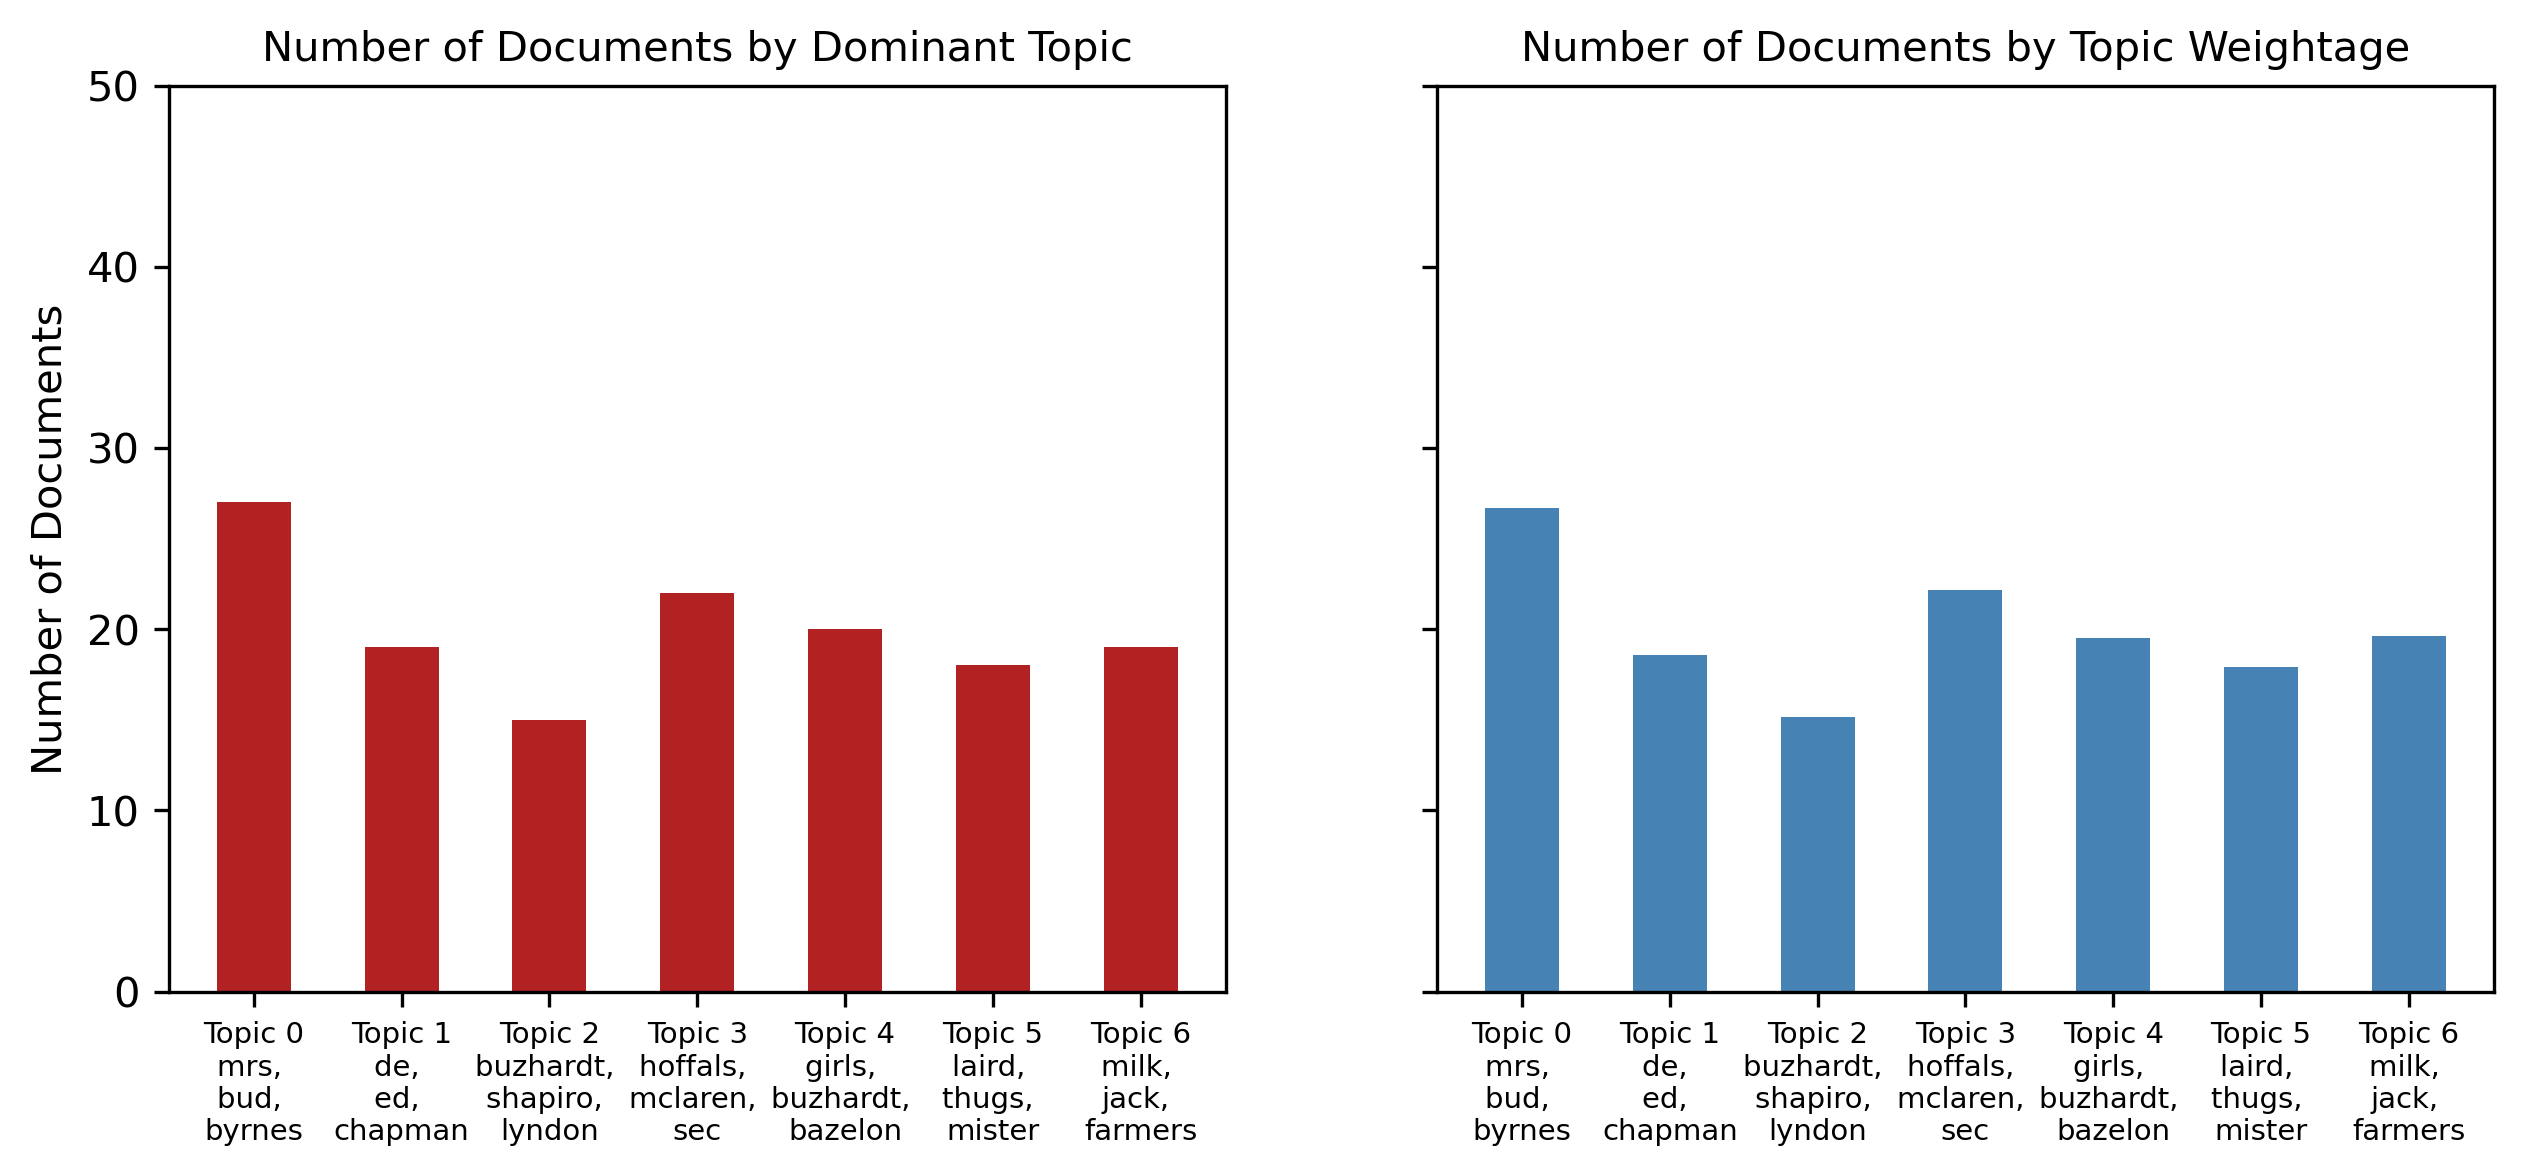

In [24]:
# Leveraged methods from below resource
# https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=300, sharey=True)

tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.tick_params(axis='x', labelsize=7)
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 50)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.tick_params(axis='x', labelsize=7)
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show();

### Enrich with Word clouds per Topic

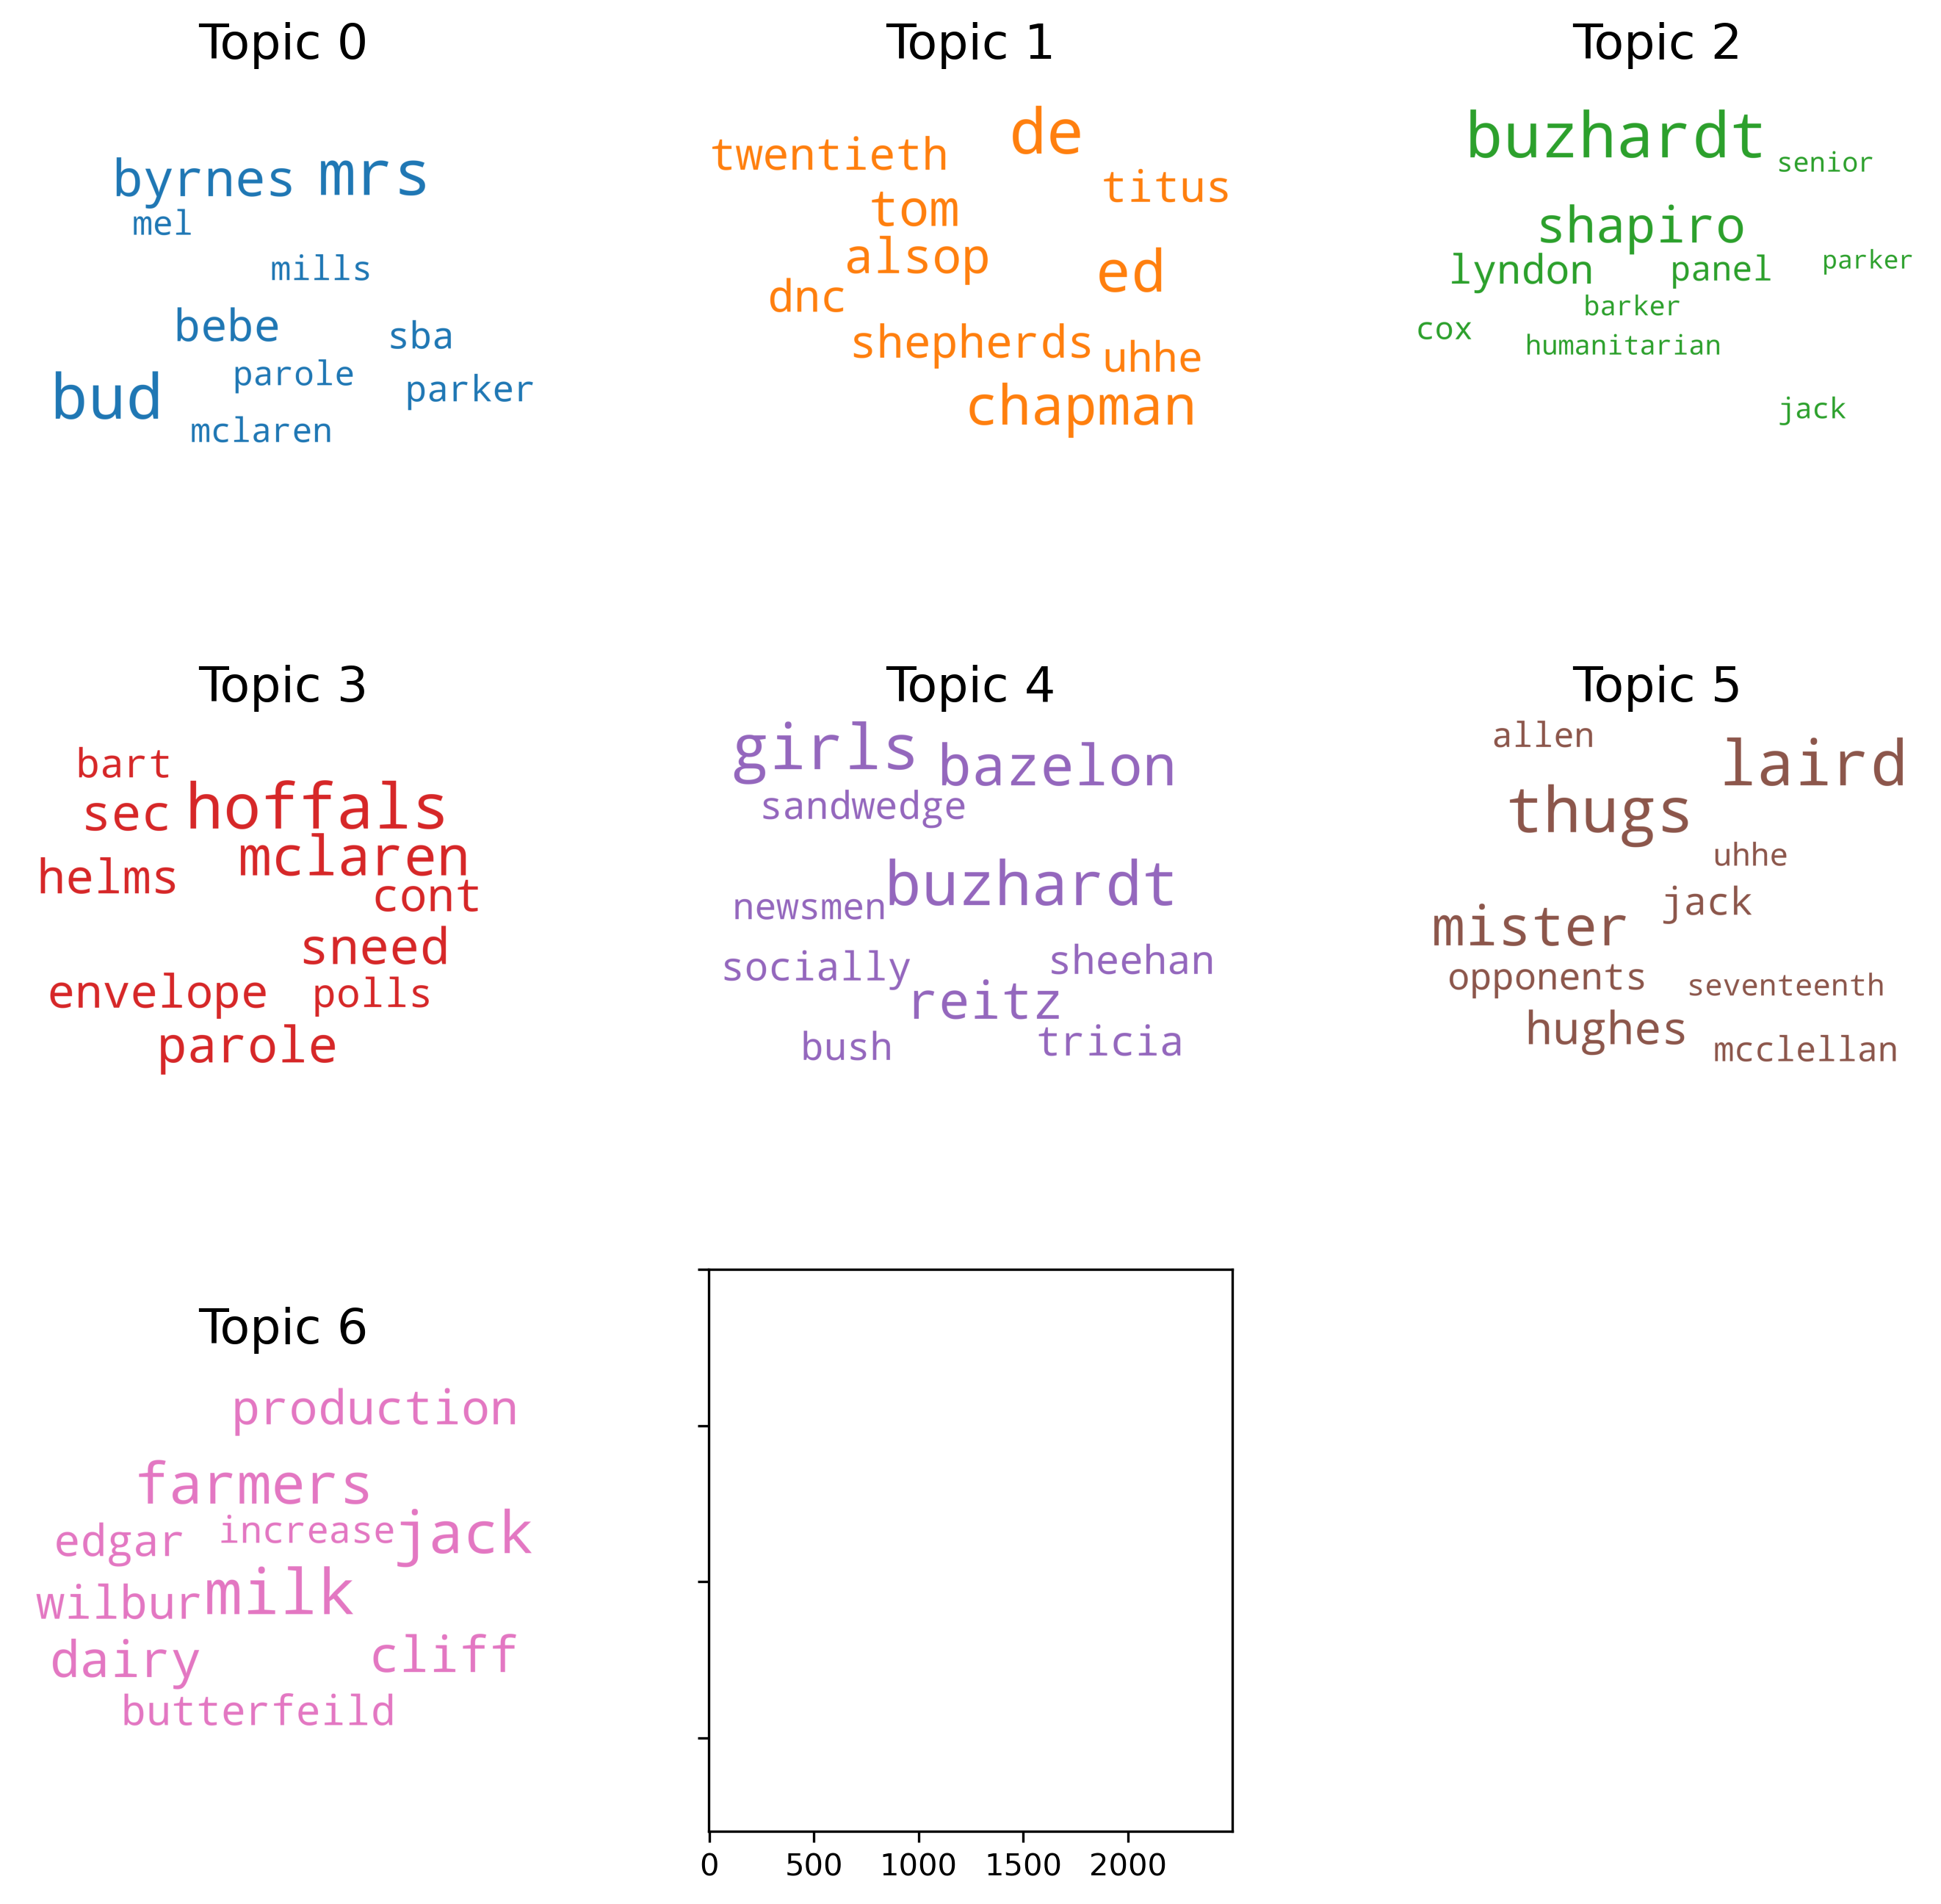

In [25]:
# Leveraged methods from below resource
# https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

# 1. Wordcloud of Top N words in each topic

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
# stopwords=stop_words,

cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = LDA_models[winner].show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10),  dpi=300, sharex=True, sharey=True)

for i in range(len(topics)):
    ax = axes.flat[i]
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    ax.axis('off')
    ax.imshow(cloud)
    ax.set_title('Topic ' + str(i), fontdict=dict(size=16))  


plt.subplots_adjust(wspace=0, hspace=0)    
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout(pad=5)
plt.show()

### Enrich with Sentiment metrics

In [26]:
# Pickle Metrics to bring in to Topic Modeling
import pickle

# pickle initial dataframe to avoid processing datagrooming
pkl_file = open('sentiment.pkl', 'rb')

df_all_sentiment_metrics = pickle.load(pkl_file)
print(df_all_sentiment_metrics.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   exhibit                141 non-null    object 
 1   orig_exhibit           141 non-null    object 
 2   speech_final_expanded  141 non-null    object 
 3   polarity               141 non-null    float64
 4   subjectivity           141 non-null    float64
 5   pol-rank               141 non-null    float64
 6   pol-interp             141 non-null    object 
 7   subj-rank              141 non-null    float64
 8   subj-interp            141 non-null    object 
dtypes: float64(4), object(5)
memory usage: 10.0+ KB
None


## Build Final Enrichment to enhance Queryabliity
* Each document will be put into a colored rectangle that represents the topic.  
* Each topic-colored rectangle will include the exibit/document ID at the top, along with the subjectivity and polarity ranking for that topic in black text.
* Each topic-colored rectangle will display the dominant keywords for that document, and each keyword will be colored by its topic 
    * *note - individual keywords do not all need to align to the parent topic*

In [27]:
# Leveraged methods from below resource
# https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=LDA_models[winner], corpus=corpus[top_pipeline], topidx = df_top_pipelines, sentchunk =df_all_sentiment_metrics[['pol-rank','pol-interp', 'subj-rank', 'subj-interp']], start = 0, end = 141, txt = ''):
    corp = corpus[start:end]
    sentchunk = sentchunk[start:end]
    exhibit_chunk = df_top_pipelines[start:end].index
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.97), dpi=300)
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i >= 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            
            #Enrich with Sentiment from current exhibit
            sent = sentchunk.iloc[i]
            exhibit_id = exhibit_chunk[i]
            sent_txt = "  Mostly {pol_i} polarity rank {pol:.1f}; mostly {sub_i} subjectivity rank {sub:.1f}."
            exhib_title_text = exhibit_id + (sent_txt.format(pol_i = sent[1], pol = sent[0], sub_i = sent[3], sub = sent[2])) # This is what will be printed at the top of each document map
            ax.text(0.01, 0.7, exhib_title_text , verticalalignment='center',
                    fontsize=14, color='black', transform=ax.transAxes, fontweight=500)
            
            # Draw Rectangle
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 1.2, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.05
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 12:
                    ax.text(word_pos, 0.3, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=14, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=400)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.8, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=15, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.suptitle('Sentence Topic Coloring for Transcripts with Sentiment Percentile Rank ' + txt, fontsize=20,fontweight=500)
    plt.tight_layout(rect=[0, 0.02, 1, 0.98])
    #plt.show();
    filename = 'data_triage_'+txt+'.png'
    fig.savefig(filename)



In [28]:
len(corpus[top_pipeline])

start = 0
end = 5
sentchunk =df_all_sentiment_metrics[['pol-rank','pol-interp', 'subj-rank', 'subj-interp']].iloc[0]
sentchunk

pol-rank       44.285714
pol-interp      positive
subj-rank      23.571429
subj-interp        facts
Name: 0, dtype: object

TypeError: unsupported operand type(s) for +: 'int' and 'str'

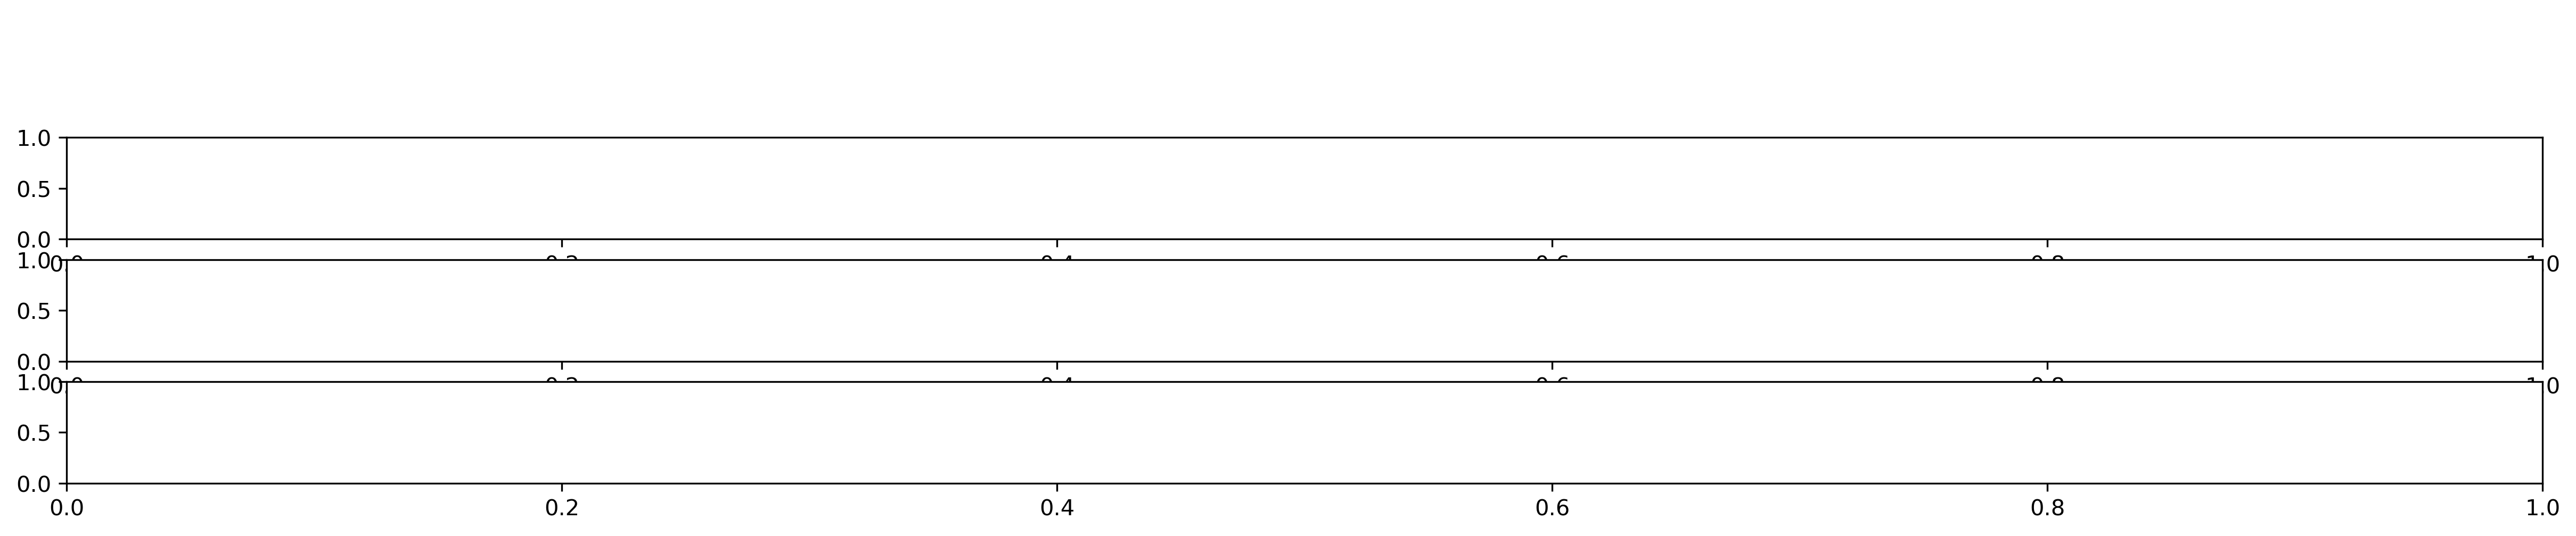

In [29]:

# build rectangle for example highlight
sentences_chart(start = 0, end = 4, txt = 'example1')

# build rectangle for example highlight
sentences_chart(start = 15, end = 26, txt = 'example')

In [ ]:
# build rectangles for all
# sentences_chart()  # very large for this dataset, recommend doing this in chunks

# build rectangles in chunks
sentences_chart(start = 0, end = 27, txt = '1_of_5')
sentences_chart(start = 28, end = 56, txt = '2_of_5')
sentences_chart(start = 57, end = 85, txt = '3_of_5')
sentences_chart(start = 86, end = 114, txt = '4_of_5')
sentences_chart(start = 115, end = 141, txt = '5_of_5')


One of the things I love about the above visualization is that it demonstrates one of the key aspects of LDA, that of mixing or overlapping topics. Topic modeling can be discrete or overlapping, if it is discrete, it is either topic A or topic B, but with LDA it allows a mixture, it calculates the percentages, and some of the percentages are not complete indicating some terms in that document pertain to other topics.  It also shows when there is a clean decision vs. a maybe decision for topic decision.  


In [ ]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=LDA_models[winner], corpus=corpus[top_pipeline], sent = df_all_sentiment_metrics[['pol-rank','pol-interp', 'subj-rank', 'subj-interp']], start = 0, end = 141, txt = ''):
    corp = corpus[start:end]
    sent = df_all_sentiment_metrics[start:end]
 #   df_top_pipelines = df_top_pipelines[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.97), dpi=300)
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i >= 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            sent = df_all_sentiment_metrics[['pol-rank','pol-interp', 'subj-rank', 'subj-interp']][start:end][df_all_sentiment_metrics.exhibit==df_top_pipelines.index[i]].values[0][start:end]
            sent_txt = "  Mostly {pol_i} polarity rank {pol:.1f}; mostly {sub_i} subjectivity rank {sub:.1f}."
            exhib_title_text = df_top_pipelines.index[i]+(sent_txt.format(pol_i = sent[1], pol = sent[0], sub_i = sent[3], sub = sent[2])) # This is what will be printed at the top of each document map
            ax.text(0.01, 0.7,exhib_title_text , verticalalignment='center',
                    fontsize=14, color='black', transform=ax.transAxes, fontweight=500)
            
            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 1.2, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.05
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 12:
                    ax.text(word_pos, 0.3, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=14, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=400)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.8, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=15, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.suptitle('Sentence Topic Coloring for Transcripts with Sentiment Percentile Rank ' + txt, fontsize=20,fontweight=500)
    plt.tight_layout(rect=[0, 0.02, 1, 0.98])
    #plt.show();
    filename = 'data_triage_'+txt+'.png'
    fig.savefig(filename)

